In [4]:
import pandas as pd
import numpy as np
#from  matplotlib import pyplot as plt
df=pd.read_csv('./movies_2.csv')
df.head(4)
#Get rid of the Summary column
df.drop('Summary', axis=1, inplace=True)
#change all columns names lowercase and add an underscore if they are made of 2 words
df.columns=df.columns.str.replace(' ', '_')
df= df.rename(columns=str.lower )
# find the nan value of column 'title'
df[df['title'].isna()]
# remove the last row
df.drop(615, axis=0, inplace=True)
# plot histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

plt.subplot(2,2,1)
plt.hist(df['rating'])
plt.title('rating')
plt.xlabel('rating')
plt.ylabel('frequency')
plt.subplot(2,2,2)
plt.hist(df['runtime'])
plt.title('run time')
plt.xlabel('run time (min)')
plt.ylabel('frequency')
plt.subplot(2,2,3)
plt.hist(df['rating_count'])
plt.title('rating count')
plt.xlabel('rating count')
plt.ylabel('frequency')
plt.subplot(2,2,4)
plt.hist(df['mpaa_rating'])
plt.title('MPAA rating')
plt.xlabel('MPAA rating')
plt.ylabel('frequency')
plt.show()
fig.tight_layout(pad=5.0)
# remove nan values of rating
df.dropna(subset=['rating'],inplace=True)
print(df.isna().sum())
# plot normal distribution for rating
#p(x) = e−(x − μ)2/2σ2/σ √2π.
mean_d=df['rating'].mean()
median_d=df['rating'].median()
std_d=df['rating'].std()
x=np.linspace(3,10,100)
def f(x):
    return (np.exp((-0.5*(x-mean_d)**2)/std_d**2))/(std_d*(2*np.pi)**0.5)

    
y=f(x)*100


plt.hist(df['rating'])
plt.plot(x,y)


NameError: name 'plt' is not defined

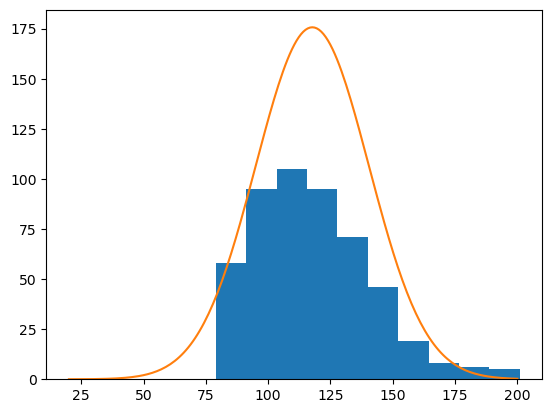

In [ ]:
df['runtime'].fillna(value=df['runtime'].median(), inplace= True)
mean_d=df['runtime'].mean()
std_d=df['runtime'].std()
x=np.linspace(20,200,200)
def f(x):
    return (np.exp((-0.5*(x-mean_d)**2)/std_d**2))/(std_d*(2*np.pi)**0.5)

    
y=f(x)*10000


plt.hist(df['runtime'])
plt.plot(x,y)



79258538.0

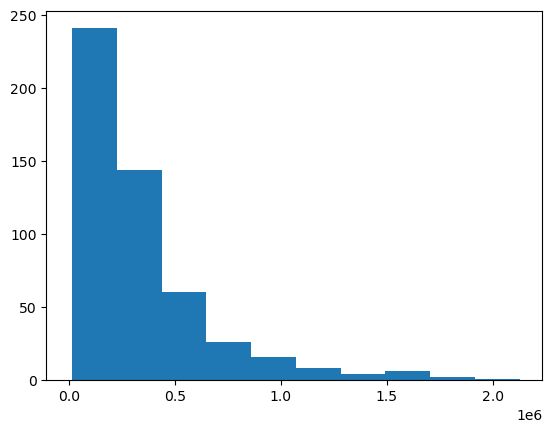

In [ ]:
df['rating_count'].fillna(value=df['rating_count'].median, inplace=True)
mean_d=df['rating_count'].mean()
std_d=df['rating_count'].std()
x=np.linspace(0,2,200)
def f(x):
    return (np.exp((-0.5*(x-mean_d)**2)/std_d**2))/(std_d*(2*np.pi)**0.5)

    
y=f(x)*10000000


plt.hist(df['rating_count'])
plt.plot(x,y)


In [ ]:
def new_fun(x):
    return x*2-4

df['runtime']=df['runtime'].apply(new_fun)
df

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
0,1,Look Who's Talking,PG-13,7500000.0,296000000.0,1989-10-12,Romance,360.0,5.9,73638.0
1,2,Driving Miss Daisy,PG,7500000.0,145793296.0,1989-12-13,Comedy,384.0,7.4,91075.0
2,3,Turner & Hooch,PG,13000000.0,71079915.0,1989-07-28,Crime,388.0,7.2,91415.0
3,4,Born on the Fourth of July,R,14000000.0,161001698.0,1989-12-20,War,568.0,7.2,91415.0
4,5,Field of Dreams,PG,15000000.0,84431625.0,1989-04-21,Drama,416.0,7.5,101702.0
...,...,...,...,...,...,...,...,...,...,...
505,506,Big Hero 6,PG,165000000.0,652105443.0,2014-10-24,Animation,396.0,7.8,380953.0
506,507,Interstellar,PG-13,165000000.0,675120017.0,2014-11-05,Science Fiction,664.0,8.6,1343549.0
507,508,Captain America: The Winter Soldier,PG-13,170000000.0,714766572.0,2014-03-20,Action,532.0,7.7,685903.0
508,509,Dawn of the Planet of the Apes,PG-13,170000000.0,710644566.0,2014-06-26,Science Fiction,508.0,7.6,395425.0


array([[<AxesSubplot:title={'center':'runtime'}>]], dtype=object)

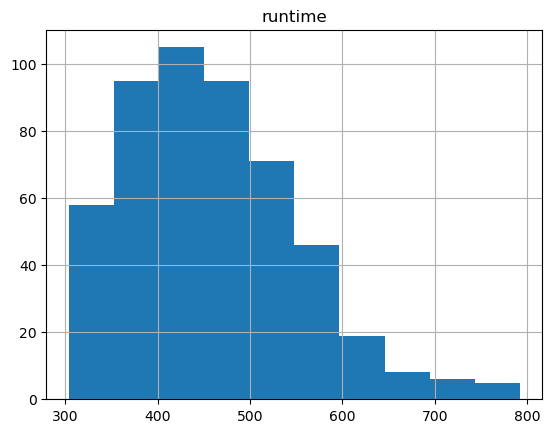

In [ ]:
df.hist(column='runtime' )



{'whiskers': [<matplotlib.lines.Line2D at 0x7fe8b59aa310>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe8b59aa8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe8b4d85f70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe8b59aae50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe8b59b6160>],
 'means': []}

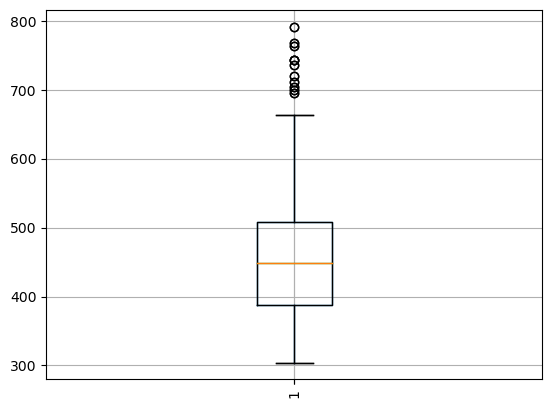

In [ ]:
df.boxplot(column='runtime', rot=90)
plt.boxplot(df['runtime'])

Text(0.5, 1.0, 'box plot of run time')

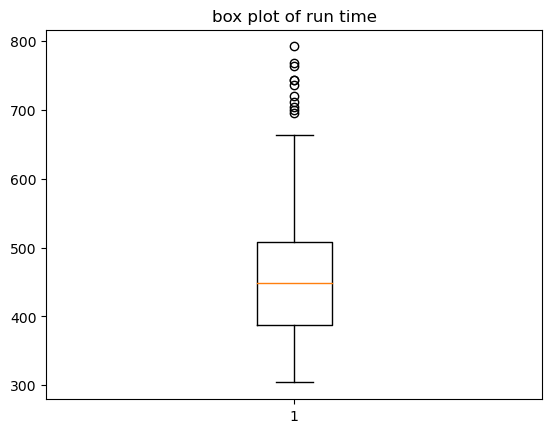

In [ ]:
plt.boxplot(df['runtime'])
plt.title('box plot of run time')


In [12]:
#remove duplicated
df.drop_duplicates()
# change type of budget to int
df['budget']=df['budget'].astype('int32')

df['gross']=df['gross'].astype('int32')
df

df['release_date']=pd.to_datetime(df['release_date'], format="%Y/%m/%d")

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
0,1,Look Who's Talking,PG-13,7500000,296000000,1989-10-12,Romance,93.0,5.9,73638.0
1,2,Driving Miss Daisy,PG,7500000,145793296,1989-12-13,Comedy,99.0,7.4,91075.0
2,3,Turner & Hooch,PG,13000000,71079915,1989-07-28,Crime,100.0,7.2,91415.0
3,4,Born on the Fourth of July,R,14000000,161001698,1989-12-20,War,145.0,7.2,91415.0
4,5,Field of Dreams,PG,15000000,84431625,1989-04-21,Drama,107.0,7.5,101702.0
...,...,...,...,...,...,...,...,...,...,...
610,611,Godzilla: King of the Monsters,PG-13,200000000,385900000,2019-05-13,Adventure,132.0,NaN,NaN
611,612,Toy Story 4,G,200000000,1062000000,2019-06-11,Animation,100.0,NaN,NaN
612,613,Fast & Furious Presents: Hobbs & Shaw,PG-13,200000000,759400000,2019-07-13,Thriller,136.0,NaN,NaN
613,614,The Lion King,PG,250000000,1632000000,2019-07-09,Drama,118.0,NaN,NaN
